# Importation des bibliotheques

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.svm import NuSVC
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import SelectFromModel
from imblearn.ensemble import BalancedBaggingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import optuna
import time




# Importation de dataset

In [ ]:
datafile = 'diabetes.csv'
df=pd.read_csv(datafile)

# Description de dataset

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.iloc[:,:-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
print("dimension of diabetes data: ",df.shape)

dimension of diabetes data:  (768, 9)


In [ ]:
df.min()

,0
Pregnancies,0.000
Glucose,44.000
BloodPressure,24.000
SkinThickness,7.000
Insulin,14.000
BMI,18.200
DiabetesPedigreeFunction,0.078
Age,21.000
Outcome,0.000


In [ ]:
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remplacer les 0 par NaN d'abord
df[cols_to_impute] = df[cols_to_impute].replace(0, np.nan)

# Calculer les moyennes par colonne (en ignorant les NaN)
col_means = df[cols_to_impute].mean()

# Remplir les NaN avec les moyennes correspondantes
df.fillna(col_means, inplace=True)

# Vérification du résultat
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.max()

,0
Pregnancies,17.00
Glucose,199.00
BloodPressure,122.00
SkinThickness,99.00
Insulin,846.00
BMI,67.10
DiabetesPedigreeFunction,2.42
Age,81.00
Outcome,1.00


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


,0
Pregnancies,"Axes(0.125,0.653529;0.227941x0.226471)"
Glucose,"Axes(0.398529,0.653529;0.227941x0.226471)"
BloodPressure,"Axes(0.672059,0.653529;0.227941x0.226471)"
SkinThickness,"Axes(0.125,0.381765;0.227941x0.226471)"
Insulin,"Axes(0.398529,0.381765;0.227941x0.226471)"
BMI,"Axes(0.672059,0.381765;0.227941x0.226471)"
DiabetesPedigreeFunction,"Axes(0.125,0.11;0.227941x0.226471)"
Age,"Axes(0.398529,0.11;0.227941x0.226471)"
Outcome,"Axes(0.672059,0.11;0.227941x0.226471)"


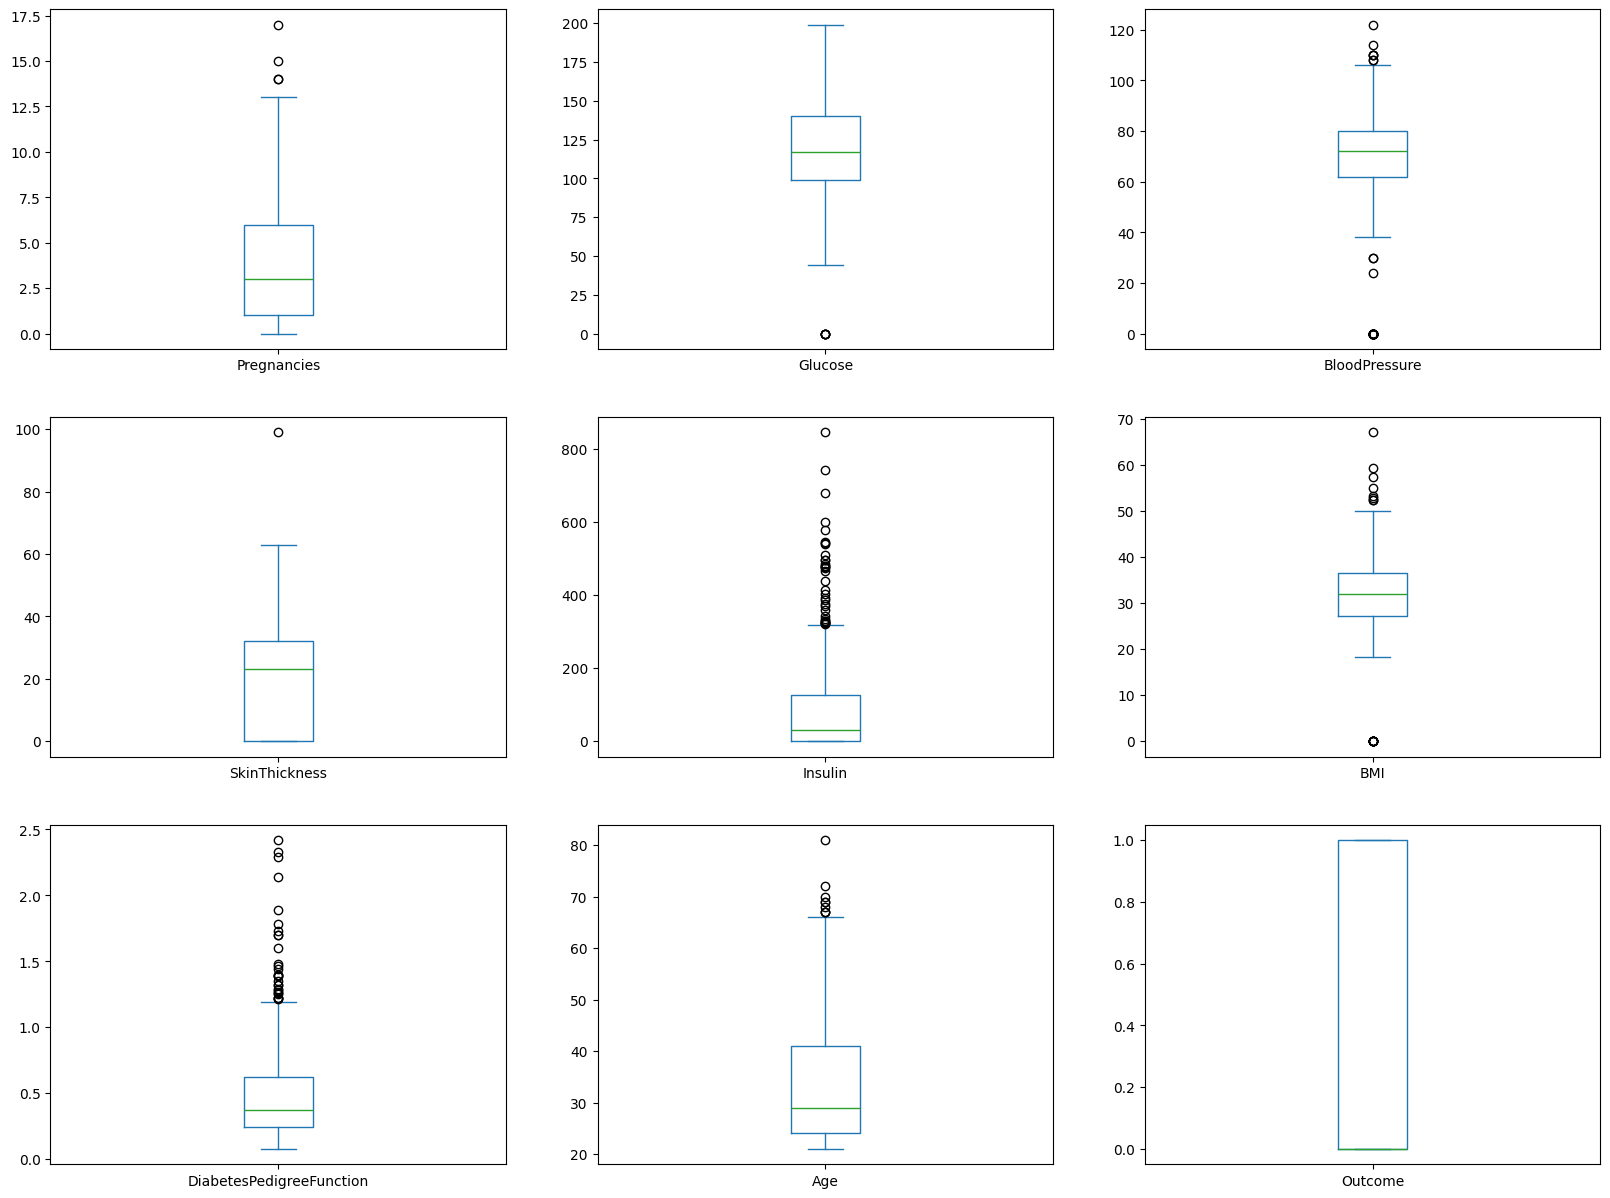

In [ ]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

# Etude des variables

**BMI**

In [ ]:
newdf=df.copy(deep=True)
Nutritional_status = pd.Series([])
for i in range(len(newdf)):
    if newdf['BMI'][i] == 0.0:
        Nutritional_status[i]="NA"

    elif newdf['BMI'][i] < 18.5:
        Nutritional_status[i]="Underweight"

    elif newdf['BMI'][i] < 25:
        Nutritional_status[i]="Normal"

    elif newdf['BMI'][i] >= 25 and newdf['BMI'][i] < 30:
        Nutritional_status[i]="Overweight"

    elif newdf['BMI'][i] >= 30:
        Nutritional_status[i]="Obese"

    else:
        Nutritional_status[i]= newdf['BMI'][i]
newdf.insert(6, "Nutritional Status", Nutritional_status)
newdf['Nutritional Status'].value_counts()


,count
Nutritional Status,
Obese,472
Overweight,179
Normal,102
NA,11
Underweight,4


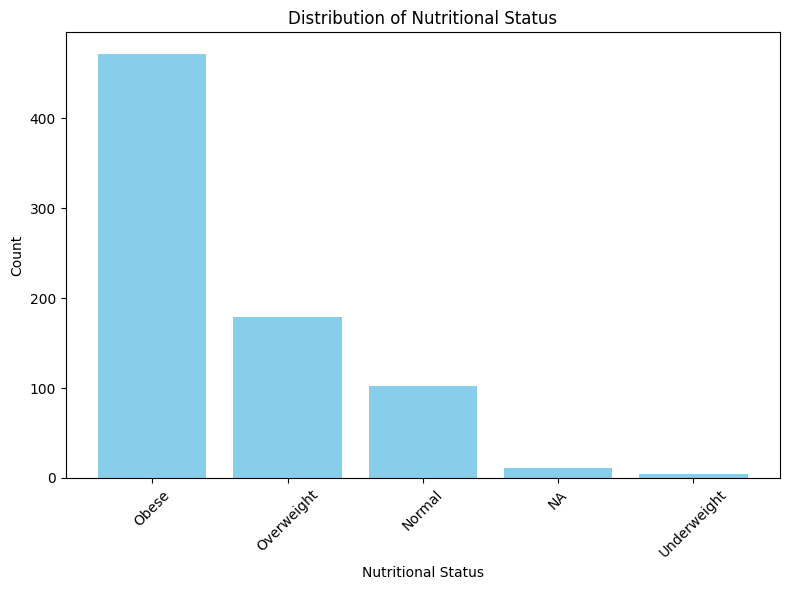

In [ ]:
status_counts = newdf['Nutritional Status'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(status_counts.index, status_counts.values, color='skyblue')
plt.xlabel('Nutritional Status')
plt.ylabel('Count')
plt.title('Distribution of Nutritional Status')
plt.xticks(rotation=45)  # Pour une meilleure lisibilité des étiquettes
plt.tight_layout()
plt.show()

**GLUCOLYSE**

In [ ]:
glucoseLevels = pd.Series([])
for i in range(len(newdf)):
    if newdf['Glucose'][i] == 0.0:
        glucoseLevels [i]="Null"

    elif newdf['Glucose'][i] <= 140:
        glucoseLevels [i]="Normal level"

    elif newdf['Glucose'][i] > 140 & newdf['Glucose'][i] <= 198:
        glucoseLevels [i]="Impaired Glucose Tolerance"

    elif newdf['Glucose'][i] > 198:
        glucoseLevels[i]="Diabetic Level"

    else:
        glucoseLevels [i]= newdf['Glucose'][i]
newdf.insert(2, "Glucose Level", glucoseLevels)
newdf['Glucose Level'].value_counts()


,count
Glucose Level,
Normal level,571
Impaired Glucose Tolerance,192
Null,5


In [ ]:
glucose_Tolerance = ((newdf["Glucose Level"] == "Impaired Glucose Tolerance") & (newdf["Outcome"] == 1)).sum()
glucose_Tolerance


np.int64(132)

In [ ]:
glucose_normale = ((newdf["Glucose Level"] == "Normal level") & (newdf ['Outcome'] == 1)).sum()
glucose_normale

np.int64(134)

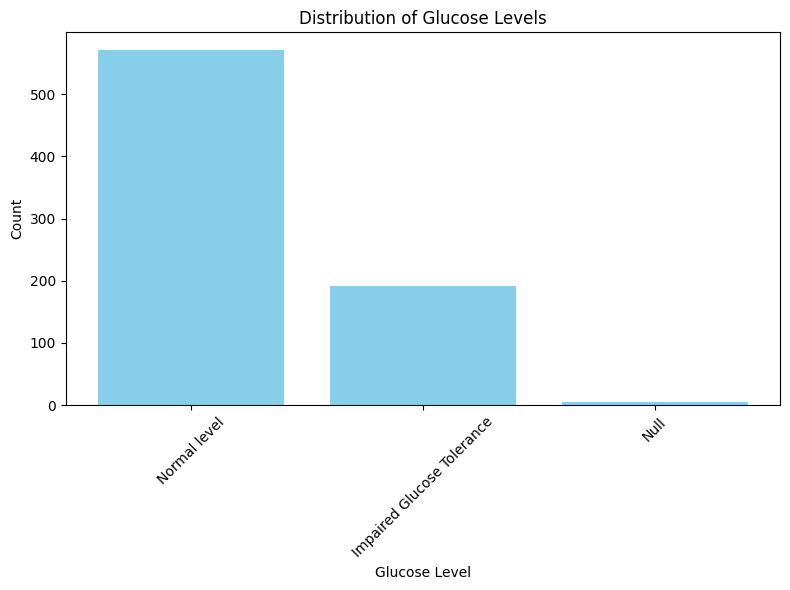

In [ ]:
plt.figure(figsize=(8,6))
counts = newdf['Glucose Level'].value_counts()
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.title("Distribution of Glucose Levels")
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()

**skin thickness**

In [ ]:
Percentile_skin_thickness = pd.Series([])
# Initialisation d'une liste pour stocker les percentiles pour chaque individu
percentile_skin_thickness = [None] * len(newdf)

# Boucle sur l'ensemble des lignes de newdf
for i in range(len(newdf)):
    # Pour les femmes âgées de 20 à 79 ans
    if newdf["Age"][i] >= 20.0 and newdf["Age"][i] <= 79.0:
        if newdf["SkinThickness"][i] == 0.0:
            percentile_skin_thickness[i] = "0 NA"
        elif newdf["SkinThickness"][i] < 10.0:
            percentile_skin_thickness[i] = "1 <P5th"
        elif newdf["SkinThickness"][i] == 10.0:
            percentile_skin_thickness[i] = "2 P5th"
        elif newdf["SkinThickness"][i] > 10.0 and newdf["SkinThickness"][i] < 12.0:
            percentile_skin_thickness[i] = "3 P5th - P10th"
        elif newdf["SkinThickness"][i] == 12.0:
            percentile_skin_thickness[i] = "4 P10th"
        elif newdf["SkinThickness"][i] > 12.0 and newdf["SkinThickness"][i] < 13.5:
            percentile_skin_thickness[i] = "5 P10th - P15th"
        elif newdf["SkinThickness"][i] == 13.5:
            percentile_skin_thickness[i] = "6 P15th"
        elif newdf["SkinThickness"][i] > 13.5 and newdf["SkinThickness"][i] < 15.0:
            percentile_skin_thickness[i] = "7 P15th - P25th"
        elif newdf["SkinThickness"][i] == 15.0:
            percentile_skin_thickness[i] = "8 P25th"
        elif newdf["SkinThickness"][i] > 15.0 and newdf["SkinThickness"][i] < 17.0:
            percentile_skin_thickness[i] = "9 P25th - P50th"
        elif newdf["SkinThickness"][i] == 17.0:
            percentile_skin_thickness[i] = "10 P50th"
        elif newdf["SkinThickness"][i] > 17.0 and newdf["SkinThickness"][i] < 22.0:
            percentile_skin_thickness[i] = "11 P50th - P75th"
        elif newdf["SkinThickness"][i] == 22.0:
            percentile_skin_thickness[i] = "12 P75th"
        elif newdf["SkinThickness"][i] > 22.0 and newdf["SkinThickness"][i] < 27.0:
            percentile_skin_thickness[i] = "13 P75th - P85th"
        elif newdf["SkinThickness"][i] == 27.0:
            percentile_skin_thickness[i] = "14 P85th"
        elif newdf["SkinThickness"][i] > 27.0 and newdf["SkinThickness"][i] < 30.0:
            percentile_skin_thickness[i] = "15 P85th - P90th"
        elif newdf["SkinThickness"][i] == 30.0:
            percentile_skin_thickness[i] = "16 P90th"
        elif newdf["SkinThickness"][i] > 30.0 and newdf["SkinThickness"][i] < 32.0:
            percentile_skin_thickness[i] = "17 P90th - P95th"
        elif newdf["SkinThickness"][i] == 32.0:
            percentile_skin_thickness[i] = "18 P95th"
        elif newdf["SkinThickness"][i] > 32.0:
            percentile_skin_thickness[i] = "19 >P95th"

    # Pour les femmes de 80 ans et plus (cas particulier, ici on ajuste le seuil)
    elif newdf["Age"][i] >= 80.0:
        if newdf["SkinThickness"][i] > 30.0:
            percentile_skin_thickness[i] = "20 >P95th"

# Insertion de la nouvelle colonne dans newdf à la position 4
newdf.insert(4, "percentile skin thickness", percentile_skin_thickness)

# Affichage du décompte des valeurs de la nouvelle colonne pour vérification
print(newdf["percentile skin thickness"].value_counts())

# Calcul des cas de diabétiques malnutris en fonction de l'épaisseur du pli cutané et de l'IMC
# Ici, nous ajustons le seuil de skinthickness à 15.0 suivant les nouveaux intervalles
diabetic_malnourished_st = ((newdf["SkinThickness"] < 15.0) & (newdf["Outcome"] == 1)).sum()
diabetic_malnourished_bmi = ((newdf["BMI"] < 18.5) & (newdf["Outcome"] == 1)).sum()
diabetic_malnourished_bmi_st = ((newdf["BMI"] < 18.5) & (newdf["SkinThickness"] < 15.0) & (newdf["Outcome"] == 1)).sum()

print(diabetic_malnourished_st, diabetic_malnourished_bmi, diabetic_malnourished_bmi_st)


percentile skin thickness
0 NA                227
19 >P95th           187
13 P75th - P85th     66
11 P50th - P75th     61
15 P85th - P90th     37
18 P95th             31
16 P90th             27
14 P85th             23
17 P90th - P95th     19
12 P75th             16
10 P50th             14
8 P25th              14
5 P10th - P15th      11
4 P10th               7
7 P15th - P25th       6
3 P5th - P10th        6
9 P25th - P50th       6
2 P5th                5
1 <P5th               4
20 >P95th             1
Name: count, dtype: int64
93 2 2


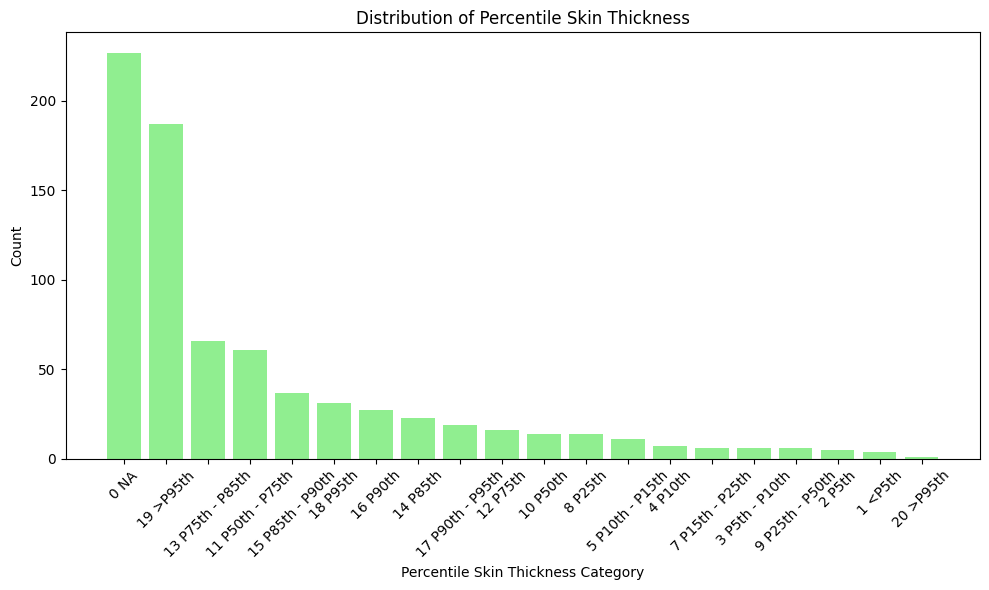

In [ ]:
counts_percentile = newdf["percentile skin thickness"].value_counts()
plt.figure(figsize=(10,6))
plt.bar(counts_percentile.index, counts_percentile.values, color='lightgreen')
plt.xlabel("Percentile Skin Thickness Category")
plt.ylabel("Count")
plt.title("Distribution of Percentile Skin Thickness")
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()

**Age**

In [ ]:
df['Age'].value_counts()

,count
Age,
22,72
21,63
25,48
24,46
23,38
28,35
26,33
27,32
29,29


In [ ]:
age_category = pd.Series([None] * len(newdf))
for i in range(len(newdf)):
    if newdf["Age"][i] < 30:
        age_category[i] = "Young Adult"
    elif newdf["Age"][i] < 40:
        age_category[i] = "Early Adult"
    elif newdf["Age"][i] < 50:
        age_category[i] = "Mid Adult"
    elif newdf["Age"][i] < 60:
        age_category[i] = "Late Adult"
    else:
        age_category[i] = "Senior"

newdf.insert(7, "Age Category", age_category)

print(newdf["Age Category"].value_counts())


Age Category
Young Adult    396
Early Adult    165
Mid Adult      118
Late Adult      57
Senior          32
Name: count, dtype: int64


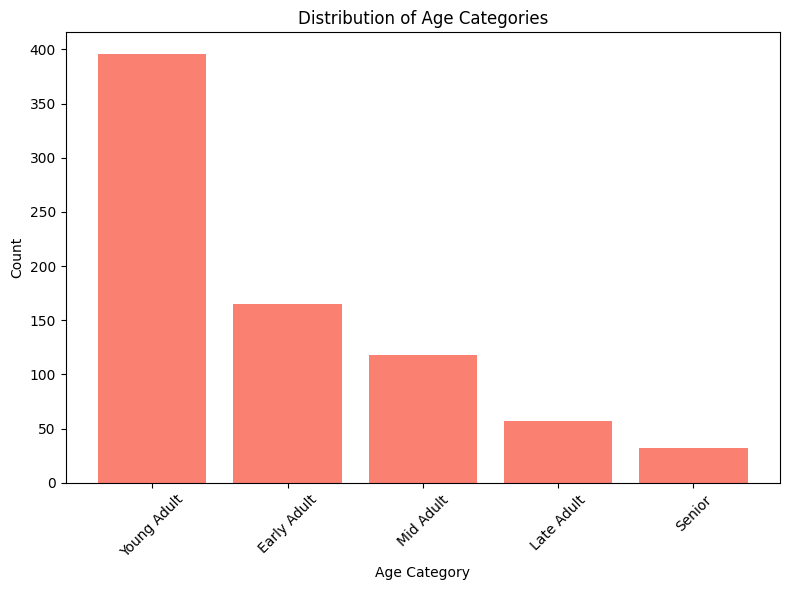

In [ ]:
age_counts = newdf["Age Category"].value_counts()
plt.figure(figsize=(8,6))
plt.bar(age_counts.index, age_counts.values, color='salmon')
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.title("Distribution of Age Categories")
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

**Pregnancies**

In [ ]:
df['Pregnancies'].value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [ ]:
pregnancies_category = pd.Series([None] * len(newdf))

# Boucle sur chaque enregistrement du DataFrame newdf
for i in range(len(newdf)):
    # Si le nombre de grossesses est 0, on attribue "No Pregnancy"
    if newdf["Pregnancies"][i] == 0:
        pregnancies_category[i] = "No Pregnancy"
    # Si le nombre de grossesses est de 1 à 2, on attribue "Low"
    elif newdf["Pregnancies"][i] <= 2:
        pregnancies_category[i] = "Low"
    # Si le nombre de grossesses est de 3 à 4, on attribue "Moderate"
    elif newdf["Pregnancies"][i] <= 4:
        pregnancies_category[i] = "Moderate"
    # Si le nombre de grossesses est de 5 à 6, on attribue "High"
    elif newdf["Pregnancies"][i] <= 6:
        pregnancies_category[i] = "High"
    # Si le nombre de grossesses est de 7 à 8, on attribue "Very High"
    elif newdf["Pregnancies"][i] <= 8:
        pregnancies_category[i] = "Very High"
    # Pour 9 grossesses ou plus, on attribue "Extremely High"
    else:
        pregnancies_category[i] = "Extremely High"

# Insertion de la nouvelle colonne "Pregnancies Category" dans newdf à la position souhaitée (par exemple, en position 8)
newdf.insert(8, "Pregnancies Category", pregnancies_category)

# Affichage du décompte de chaque catégorie pour vérification
print(newdf["Pregnancies Category"].value_counts())

Pregnancies Category
Low               238
Moderate          143
No Pregnancy      111
High              107
Extremely High     86
Very High          83
Name: count, dtype: int64


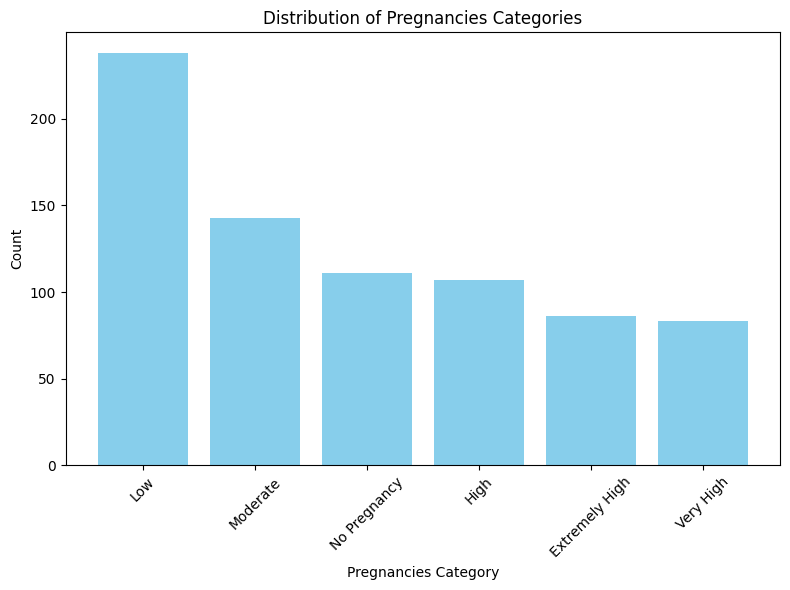

In [ ]:
preg_counts = newdf["Pregnancies Category"].value_counts()
plt.figure(figsize=(8,6))
plt.bar(preg_counts.index, preg_counts.values, color='skyblue')
plt.xlabel("Pregnancies Category")
plt.ylabel("Count")
plt.title("Distribution of Pregnancies Categories")
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()


# Correlation entre les variables

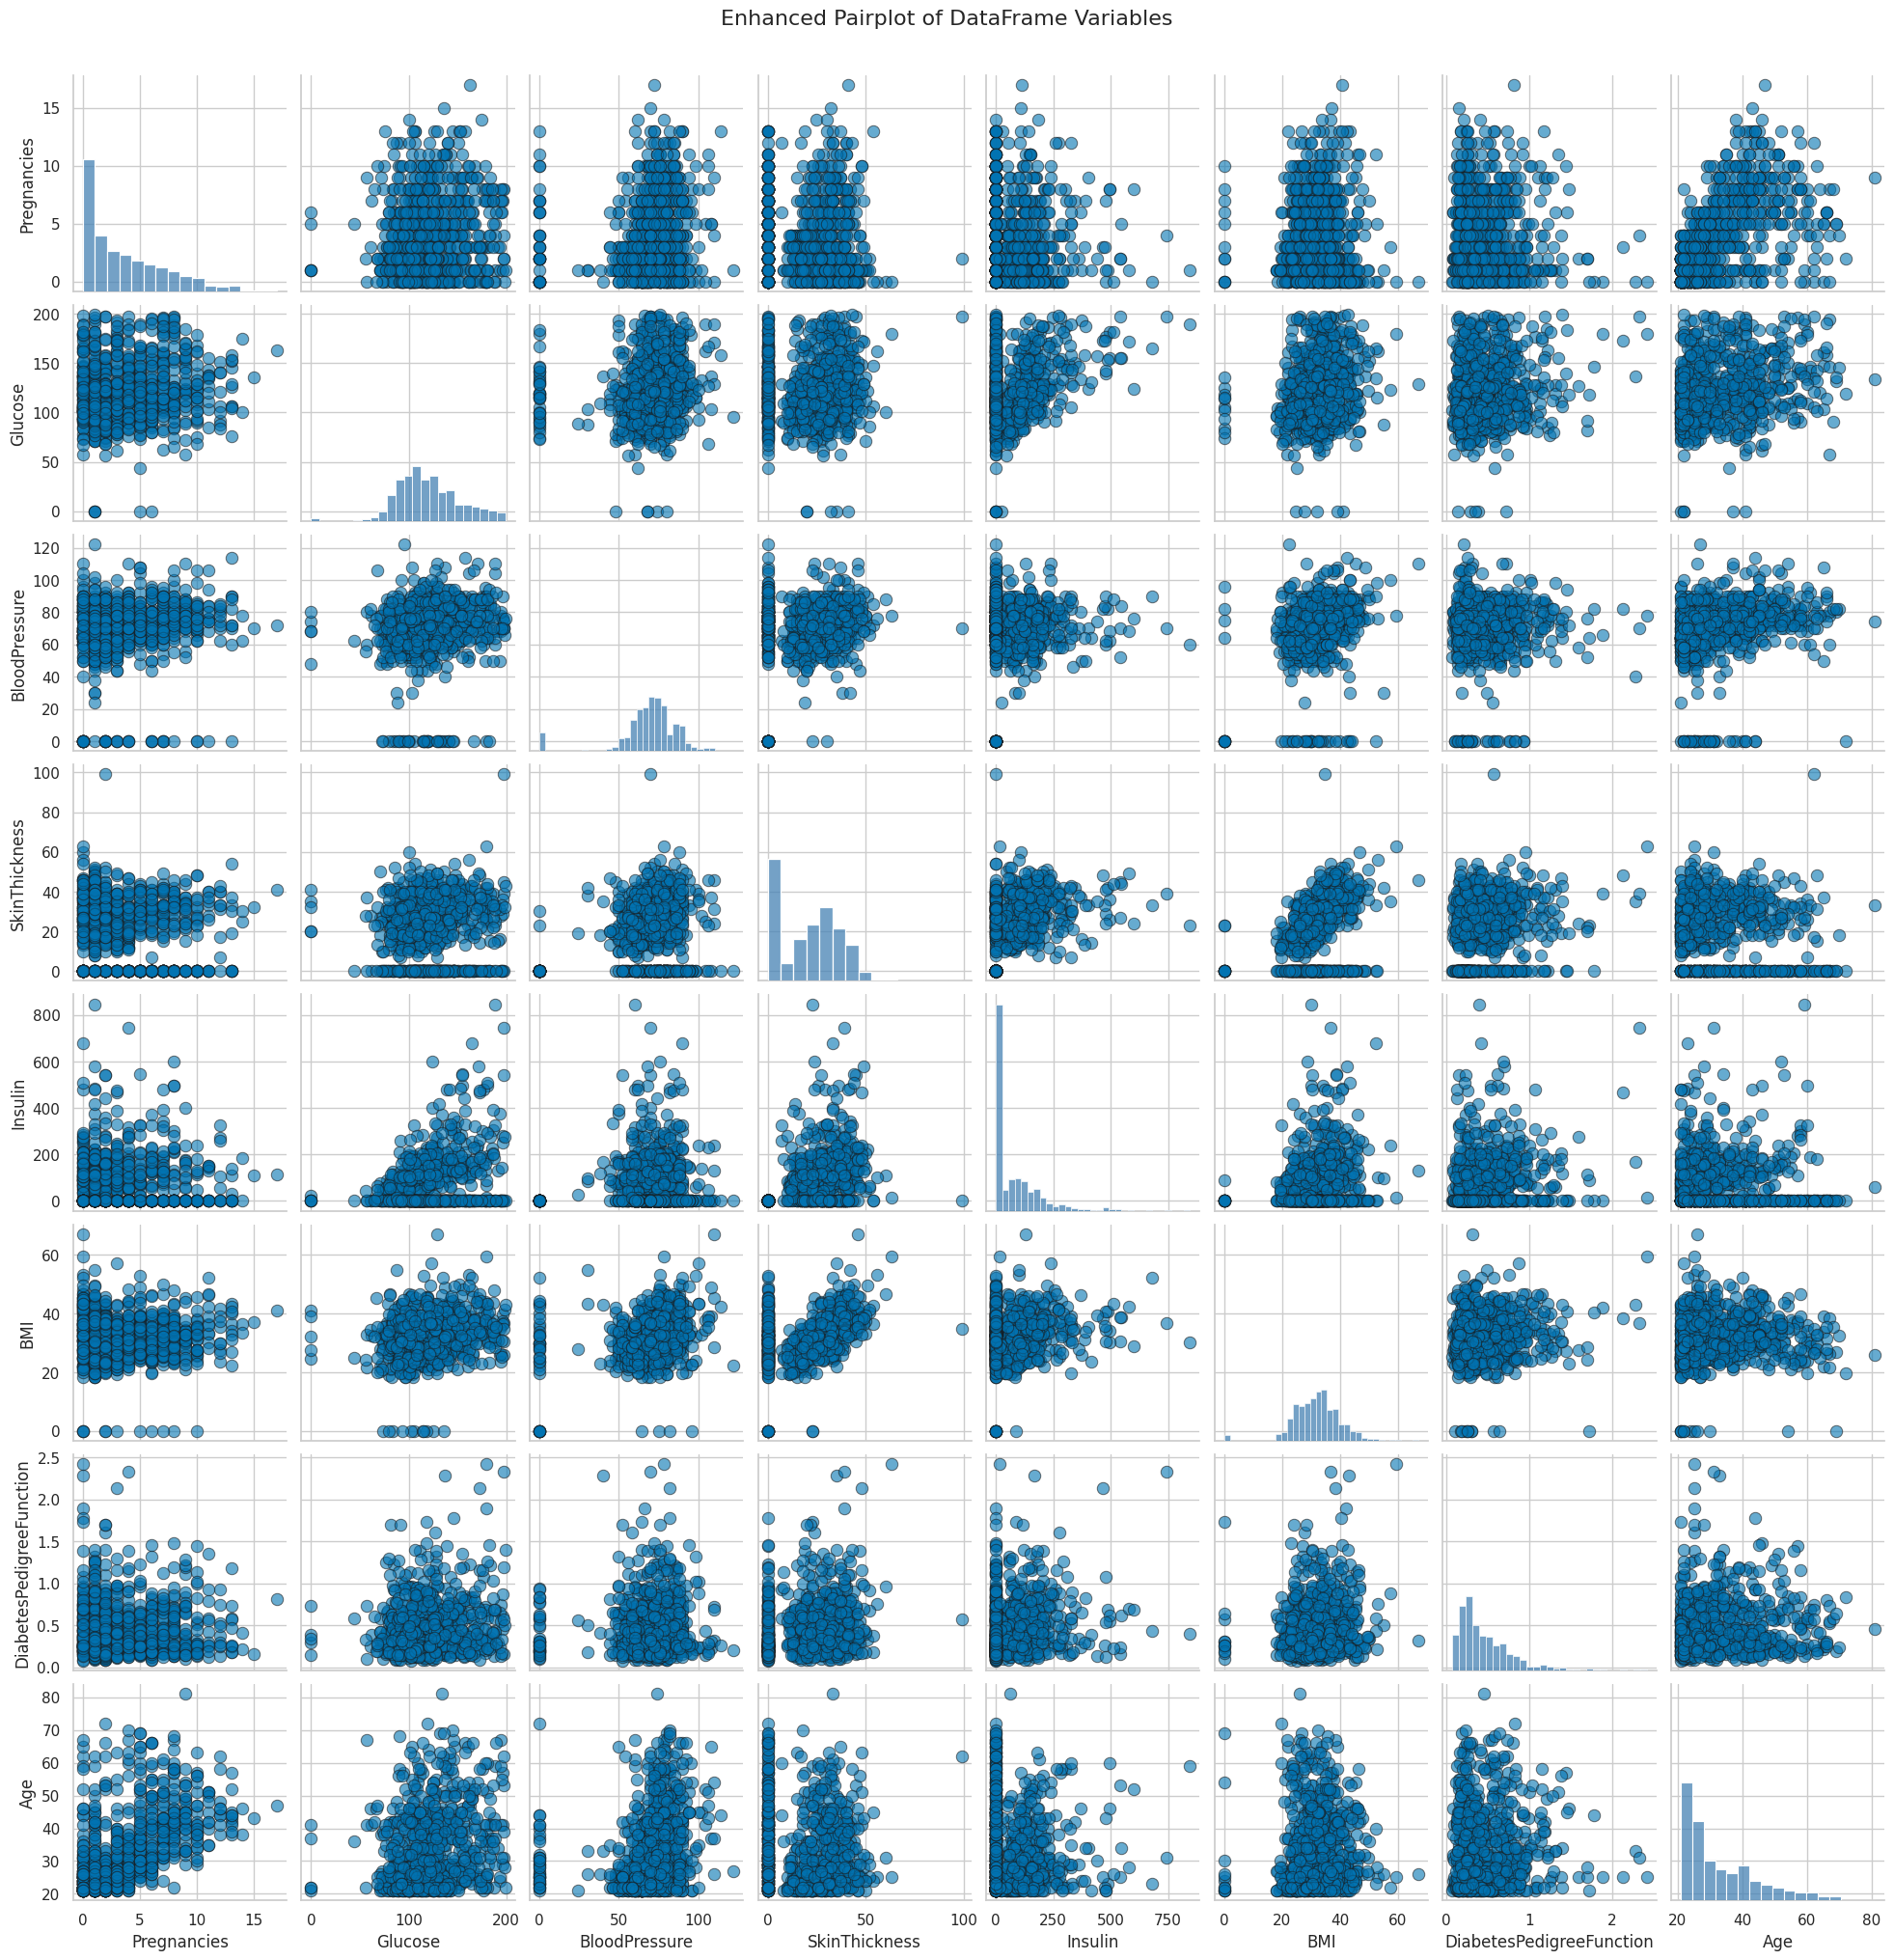

In [ ]:
sns.set(style="whitegrid", palette="colorblind", context="notebook")
pair_plot = sns.pairplot(
    df.iloc[:, :-1],
    diag_kind="hist",
    plot_kws={"alpha": 0.6, "s": 80, "edgecolor": "k"},
    diag_kws={"color": "steelblue"}
)
pair_plot.fig.suptitle("Enhanced Pairplot of DataFrame Variables", y=1.02, fontsize=16)
plt.show()

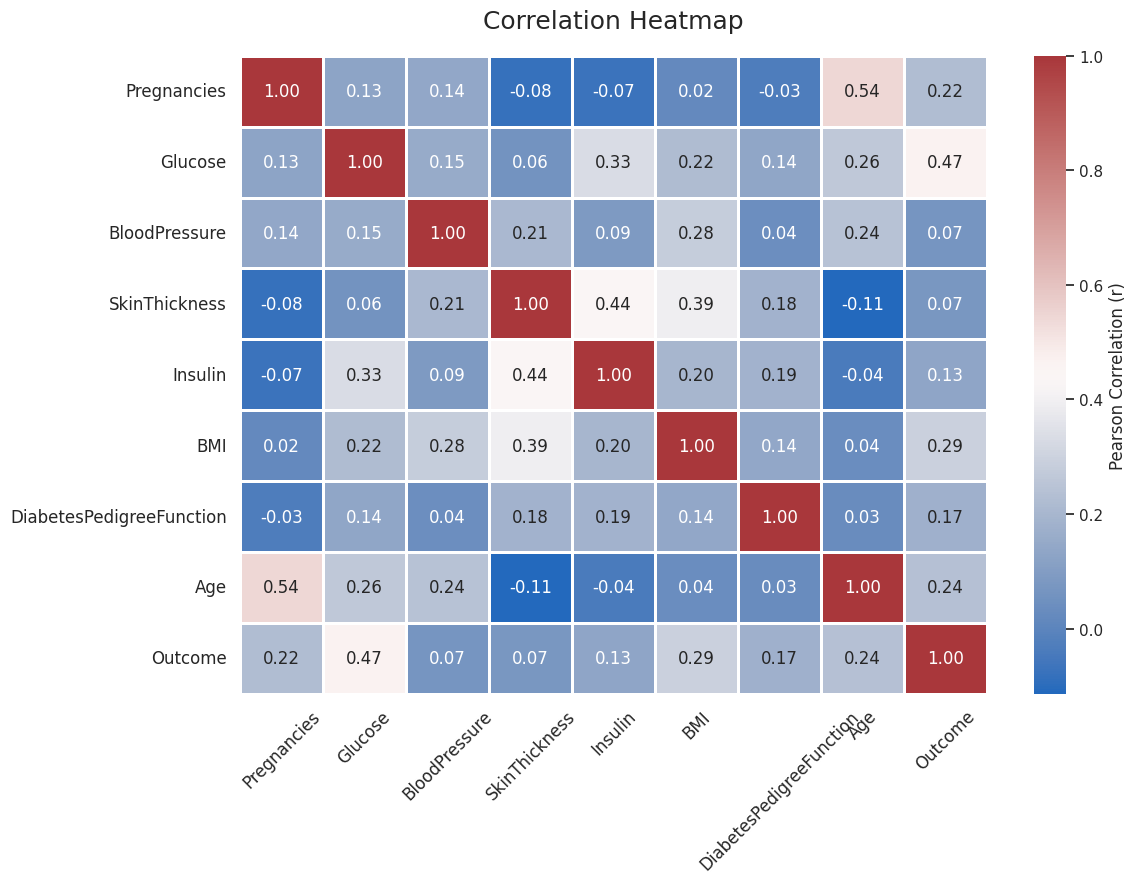

In [ ]:
corr_mat = df.iloc[:,:].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat,
            annot=True,
            fmt=".2f",
            cmap="vlag",
            linewidths=2,
            cbar_kws={'label':'Pearson Correlation (r)'})
plt.title("Correlation Heatmap", fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
# Ajustement de la mise en page pour éviter le chevauchement des éléments
plt.tight_layout()
plt.savefig('Enhanced_Correlation.png', dpi=300)
plt.show()

# Data preparation

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
## 1. Préparation avancée des données
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Transformation des features
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X)

# Split avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.15, random_state=42, stratify=y)

# Entrainement

[I 2025-04-30 17:23:42,860] A new study created in memory with name: no-name-f84d5fd5-7264-4593-b4cc-84f6eadd3c4c
[I 2025-04-30 17:23:45,576] Trial 0 finished with value: 0.7621843805049913 and parameters: {'hidden_layer_sizes': (64, 32, 16), 'alpha': 2.6460499840865943e-05, 'learning_rate_init': 0.07940452156718374, 'batch_size': 128, 'activation': 'tanh'}. Best is trial 0 with value: 0.7621843805049913.
[I 2025-04-30 17:23:45,994] Trial 1 finished with value: 0.7376277157956548 and parameters: {'hidden_layer_sizes': (128, 64), 'alpha': 0.0007695047955459689, 'learning_rate_init': 0.04221313518427799, 'batch_size': 128, 'activation': 'relu'}. Best is trial 0 with value: 0.7621843805049913.
[I 2025-04-30 17:23:47,037] Trial 2 finished with value: 0.7576394597768644 and parameters: {'hidden_layer_sizes': (64, 32, 16), 'alpha': 0.00012644451047644293, 'learning_rate_init': 0.08249497554859536, 'batch_size': 32, 'activation': 'tanh'}. Best is trial 0 with value: 0.7621843805049913.
[I 202

LogisticRegression - Accuracy: 0.7414, Precision: 0.5962
CalibratedXGB - Accuracy: 0.7586, Precision: 0.7143
BalancedLGBM - Accuracy: 0.7586, Precision: 0.6111
CatBoost - Accuracy: 0.7759, Precision: 0.6400
HistGradient - Accuracy: 0.7500, Precision: 0.6341
NuSVC - Accuracy: 0.7241, Precision: 0.5909
MLP - Accuracy: 0.7414, Precision: 0.6389
OptimizedMLP - Accuracy: 0.7672, Precision: 0.6667

=== RÉSULTATS AVANCÉS ===
                    Accuracy  Precision  Recall        F1       AUC
CatBoost            0.775862   0.640000   0.800  0.711111  0.844408
OptimizedMLP        0.767241   0.666667   0.650  0.658228  0.844408
CalibratedXGB       0.758621   0.714286   0.500  0.588235  0.826645
BalancedLGBM        0.758621   0.611111   0.825  0.702128  0.845395
HistGradient        0.750000   0.634146   0.650  0.641975  0.820066
MLP                 0.741379   0.638889   0.575  0.605263  0.836184
LogisticRegression  0.741379   0.596154   0.775  0.673913  0.842105
NuSVC               0.724138   0.5

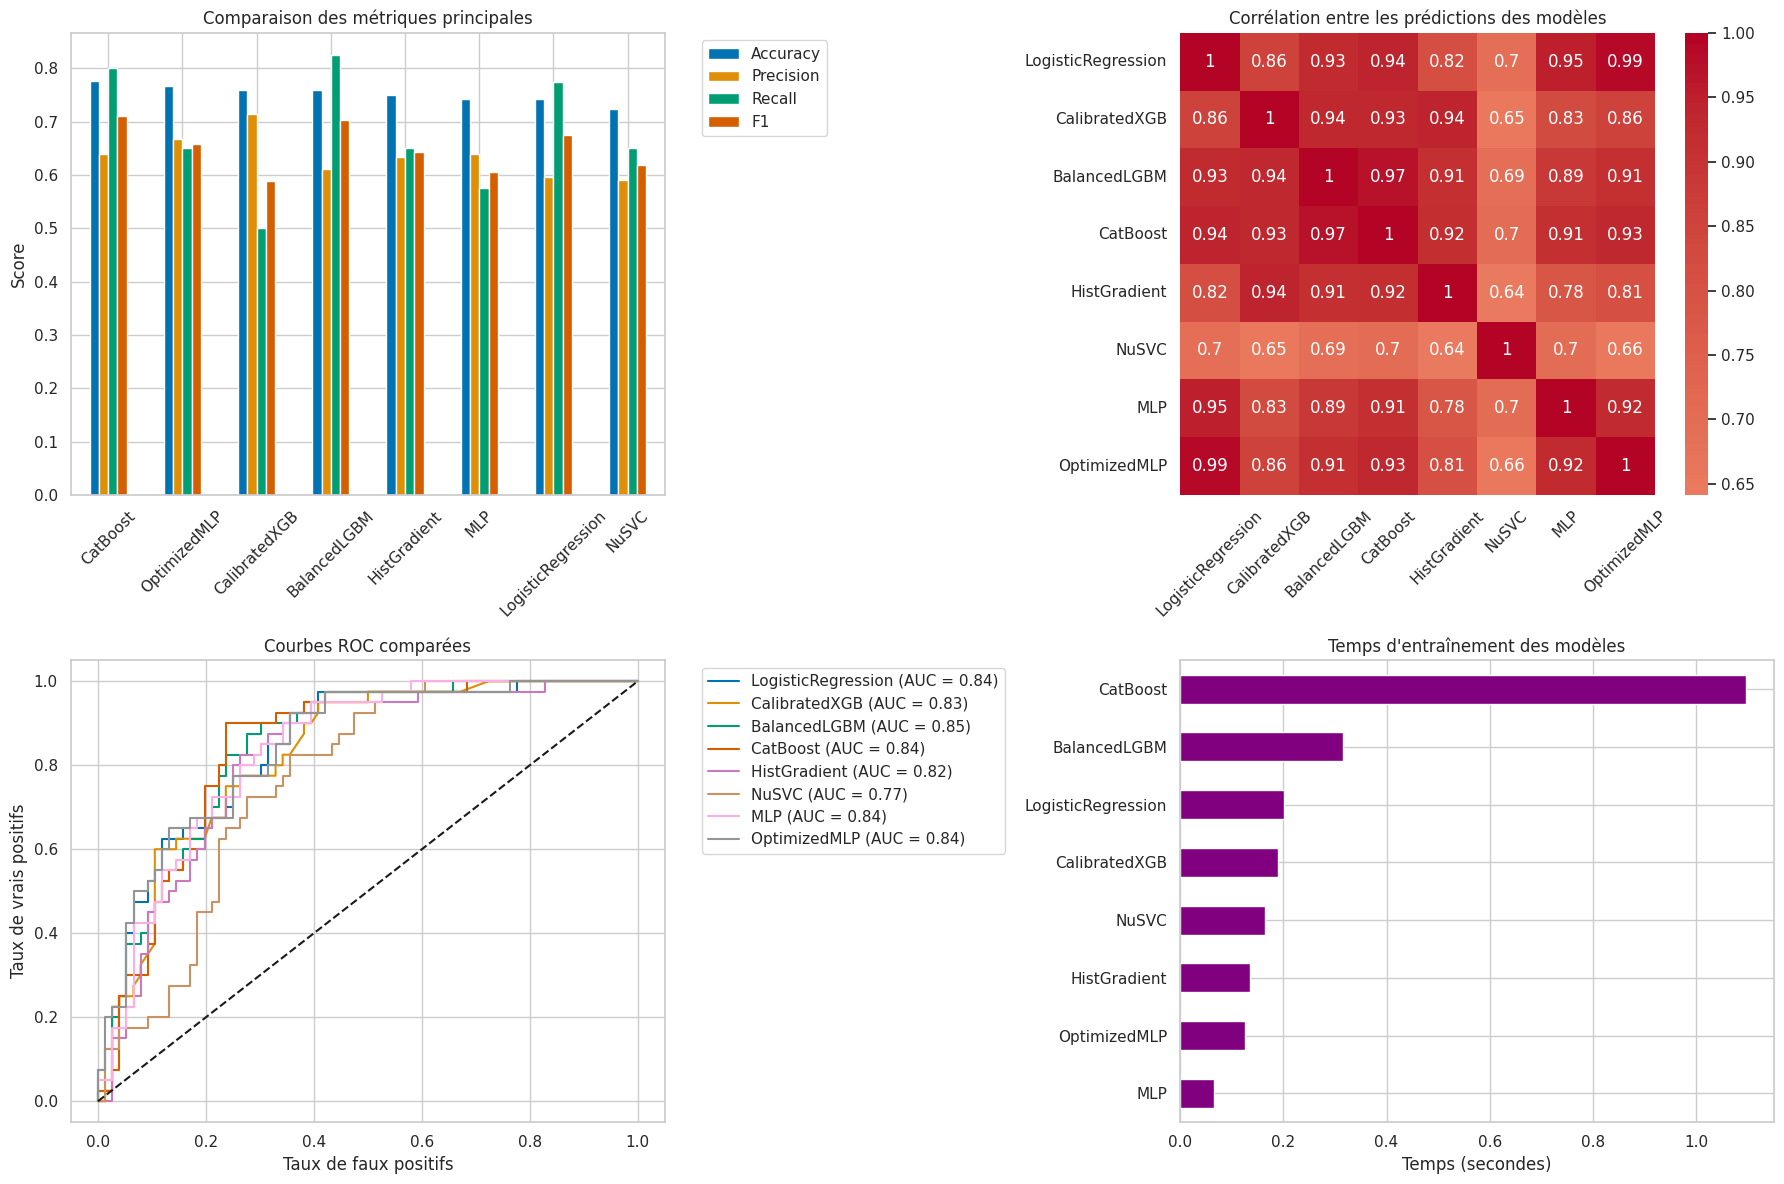


=== MEILLEUR SEUIL ===
Seuil optimal: 0.5000
Empty DataFrame
Columns: []
Index: [0]


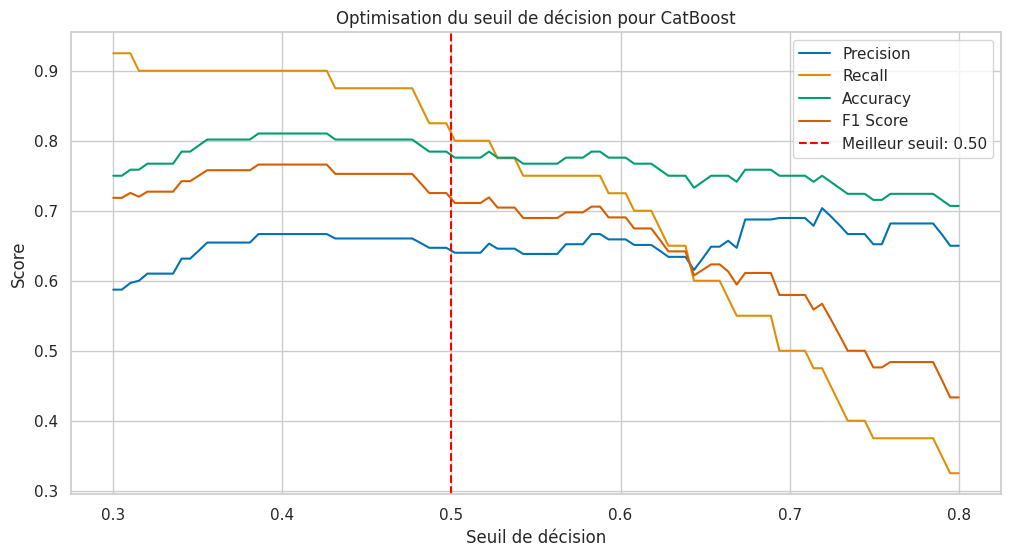


=== PERFORMANCE DU STACKING ===
Accuracy: 0.7414
Precision: 0.5893
Recall: 0.8250
F1: 0.6875
AUC: 0.7921


In [ ]:

## 2. Sélection de features avancée
selector = SelectFromModel(ExtraTreesClassifier(n_estimators=100))
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000)
param_distributions = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2']
}
rs_log = RandomizedSearchCV(
    log_reg,
    param_distributions,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
## 3. Définition des modèles avancés
models = {
    "LogisticRegression": rs_log,
    "CalibratedXGB": CalibratedClassifierCV(
        XGBClassifier(enable_categorical=True),
        method='isotonic', cv=3),
    "BalancedLGBM": BalancedBaggingClassifier(
        LGBMClassifier(verbose=-1),
        sampling_strategy='auto',
        replacement=True),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "HistGradient": HistGradientBoostingClassifier(
        class_weight='balanced'),
    "NuSVC": NuSVC(probability=True, nu=0.3),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), early_stopping=True)
}

## 4. Optimisation automatique avec Optuna
def optimize_mlp(trial):
    params = {
        'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes',
                           [(64,32), (128,64), (64,32,16), (128,64,32)]),
        'alpha': trial.suggest_float('alpha', 1e-5, 1e-1, log=True),
        'learning_rate_init': trial.suggest_float('learning_rate_init', 1e-4, 1e-1),
        'batch_size': trial.suggest_categorical('batch_size', [32, 64, 128]),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh'])
    }
    model = MLPClassifier(**params, early_stopping=True, max_iter=500)
    return cross_val_score(model, X_train_sel, y_train,
                         n_jobs=-1, cv=5, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(optimize_mlp, n_trials=20)
best_mlp_params = study.best_params
models["OptimizedMLP"] = MLPClassifier(**best_mlp_params, early_stopping=True, max_iter=500)

## 5. Entraînement et évaluation
results = {}
for name, model in models.items():
    try:
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)

        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'AUC': roc_auc_score(y_test, model.predict_proba(X_test_sel)[:,1]) if hasattr(model, 'predict_proba') else np.nan
        }
        print(f"{name} - Accuracy: {results[name]['Accuracy']:.4f}, Precision: {results[name]['Precision']:.4f}")
    except Exception as e:
        print(f"Erreur avec {name}: {str(e)}")
        results[name] = {metric: np.nan for metric in ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']}

## 6. Résultats finaux
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)
print("\n=== RÉSULTATS AVANCÉS ===")
print(results_df)

## 7. Visualisations comparatives
plt.figure(figsize=(18, 12))

# 1. Comparaison des métriques principales
plt.subplot(2, 2, 1)
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
results_df[metrics_to_plot].plot(kind='bar', ax=plt.gca())
plt.title("Comparaison des métriques principales")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Matrice de corrélation entre les prédictions des modèles
plt.subplot(2, 2, 2)
predictions = pd.DataFrame()
for name, model in models.items():
    try:
        if hasattr(model, 'predict_proba'):
            predictions[name] = model.predict_proba(X_test_sel)[:,1]
        else:
            predictions[name] = model.predict(X_test_sel)
    except Exception as e:
        print(f"Erreur avec {name} pour les prédictions: {str(e)}")

# Suppression des colonnes avec NaN
predictions = predictions.dropna(axis=1)

if not predictions.empty:
    corr_matrix = predictions.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=plt.gca())
    plt.title("Corrélation entre les prédictions des modèles")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
else:
    plt.text(0.5, 0.5, 'Aucune donnée disponible', ha='center', va='center')
    plt.title("Pas de données pour la corrélation")

# 3. Courbe ROC pour les modèles avec predict_proba
plt.subplot(2, 2, 3)
for name, model in models.items():
    try:
        if hasattr(model, 'predict_proba'):
            y_probs = model.predict_proba(X_test_sel)[:,1]
            if not np.isnan(y_probs).any():
                fpr, tpr, _ = roc_curve(y_test, y_probs)
                auc_score = roc_auc_score(y_test, y_probs)
                plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    except Exception as e:
        print(f"Erreur avec {name} pour ROC: {str(e)}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC comparées')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Comparaison des temps d'entraînement
plt.subplot(2, 2, 4)
training_times = {}
for name, model in models.items():
    try:
        start_time = time.time()
        model.fit(X_train_sel, y_train)
        training_times[name] = time.time() - start_time
    except Exception as e:
        print(f"Erreur avec {name} pour temps d'entraînement: {str(e)}")

if training_times:
    pd.Series(training_times).sort_values().plot(kind='barh', color='purple', ax=plt.gca())
    plt.title("Temps d'entraînement des modèles")
    plt.xlabel("Temps (secondes)")
else:
    plt.text(0.5, 0.5, 'Aucune donnée disponible', ha='center', va='center')
    plt.title("Pas de données pour les temps")

plt.tight_layout()
plt.show()



## 8. Optimisation du seuil sur le meilleur modèle
if not results_df.empty:
    best_model_name = results_df.index[0]
    best_model = models[best_model_name]

    if hasattr(best_model, 'predict_proba'):
        y_probs = best_model.predict_proba(X_test_sel)[:,1]

        # Trouver le seuil optimal pour Precision >= 0.8
        thresholds = np.linspace(0.3, 0.8, 100)
        best_threshold = 0.5
        best_metrics = {}

        for thresh in thresholds:
            y_pred = (y_probs >= thresh).astype(int)
            precision = precision_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)

            if precision >= 0.8 and accuracy > best_metrics.get('Accuracy', 0):
                best_threshold = thresh
                best_metrics = {
                    'Threshold': thresh,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall_score(y_test, y_pred),
                    'F1': f1_score(y_test, y_pred)
                }

        print("\n=== MEILLEUR SEUIL ===")
        print(f"Seuil optimal: {best_threshold:.4f}")
        print(pd.DataFrame([best_metrics]))

        # Visualisation de l'optimisation du seuil
        plt.figure(figsize=(12, 6))

        precisions = []
        recalls = []
        accuracies = []
        f1s = []

        for thresh in thresholds:
            y_pred = (y_probs >= thresh).astype(int)
            precisions.append(precision_score(y_test, y_pred))
            recalls.append(recall_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            f1s.append(f1_score(y_test, y_pred))

        plt.plot(thresholds, precisions, label='Precision')
        plt.plot(thresholds, recalls, label='Recall')
        plt.plot(thresholds, accuracies, label='Accuracy')
        plt.plot(thresholds, f1s, label='F1 Score')
        plt.axvline(best_threshold, color='red', linestyle='--', label=f'Meilleur seuil: {best_threshold:.2f}')
        plt.xlabel("Seuil de décision")
        plt.ylabel("Score")
        plt.title(f"Optimisation du seuil de décision pour {best_model_name}")
        plt.legend()
        plt.grid(True)
        plt.show()

## 9. Stacking final
top_models = [(name, models[name]) for name in results_df.index[:3]]

stack = StackingClassifier(
    estimators=top_models,
    final_estimator=LogisticRegression(C=0.01, penalty='l1', solver='liblinear'),
    cv=3,
    passthrough=True,
    n_jobs=-1
)

stack.fit(X_train_sel, y_train)
stack_pred = stack.predict(X_test_sel)

print("\n=== PERFORMANCE DU STACKING ===")
print(f"Accuracy: {accuracy_score(y_test, stack_pred):.4f}")
print(f"Precision: {precision_score(y_test, stack_pred):.4f}")
print(f"Recall: {recall_score(y_test, stack_pred):.4f}")
print(f"F1: {f1_score(y_test, stack_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, stack.predict_proba(X_test_sel)[:,1]):.4f}")

